In [1]:
#import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [3]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [4]:
# Build the model using the function API
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)


In [5]:
# Compile amd fit
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r= model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 44s 27ms/step - loss: 1.5767 - accuracy: 0.4240 - val_loss: 1.2989 - val_accuracy: 0.5238
Epoch 2/15
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2866 - accuracy: 0.5373 - val_loss: 1.1868 - val_accuracy: 0.5703
Epoch 3/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1578 - accuracy: 0.5871 - val_loss: 1.0362 - val_accuracy: 0.6321
Epoch 4/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0613 - accuracy: 0.6220 - val_loss: 0.9625 - val_accuracy: 0.6633
Epoch 5/15
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9832 - accuracy: 0.6494 - val_loss: 0.9402 - val_accuracy: 0.6660
Epoch 6/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9231 - accuracy: 0.6728 - val_loss: 0.9741 - val_accuracy: 0.6645
Epoch 7/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8707 - accuracy: 0.6908 - val_loss: 0.8715 -

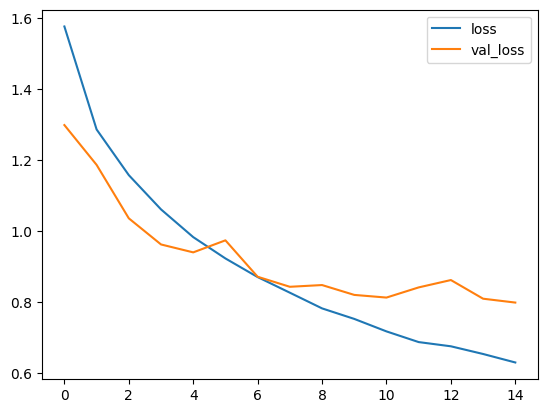

In [6]:
# Plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

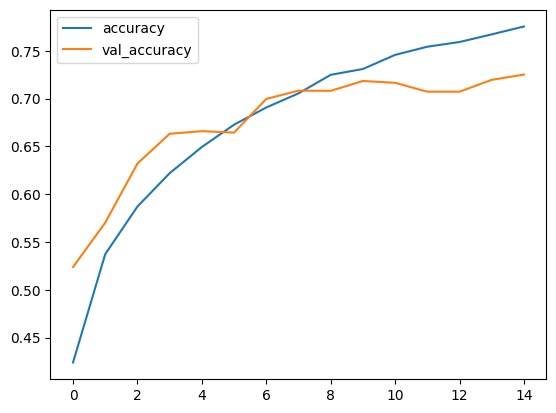

In [7]:
# Plot loss per iteration
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

313/313 [==============================] - 2s 7ms/step
Confusion matrix, without normalization
[[762  16  38  21  26   5   6  15  66  45]
 [ 16 818   2   6   7   5   8   4  26 108]
 [ 52   6 551  86 124  78  41  36  15  11]
 [ 12   9  44 529  75 207  48  39  16  21]
 [ 14   1  48  57 728  40  27  74   6   5]
 [  8   1  25 169  55 656  18  54   6   8]
 [  2  11  26  66  60  50 762  12   5   6]
 [  9   3  18  32  59  68   5 786   5  15]
 [ 52  38   7  17  14   7   3   3 828  31]
 [ 21  73   8  17   2   7   4  14  22 832]]


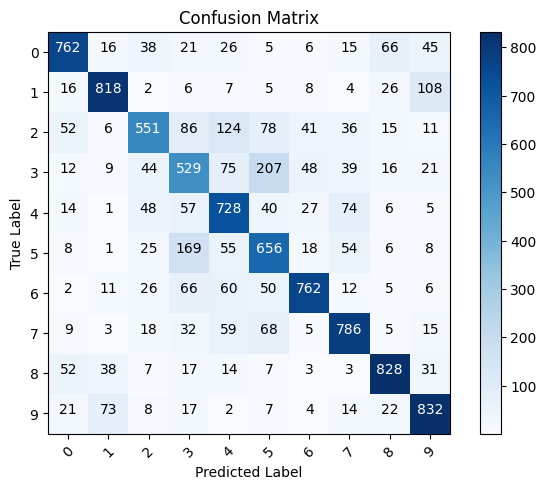

In [10]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize = True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [11]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: automobile Predicted: truck')

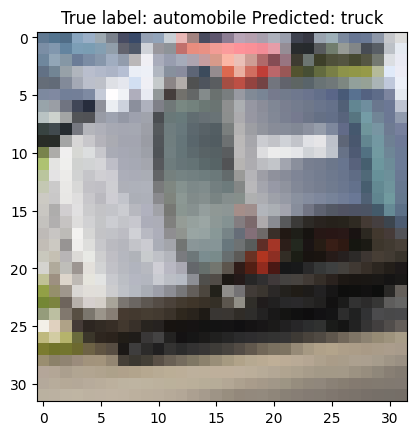

In [13]:
# show misclassified samples
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

Text(0.5, 1.0, 'True label: bird Predicted: bird')

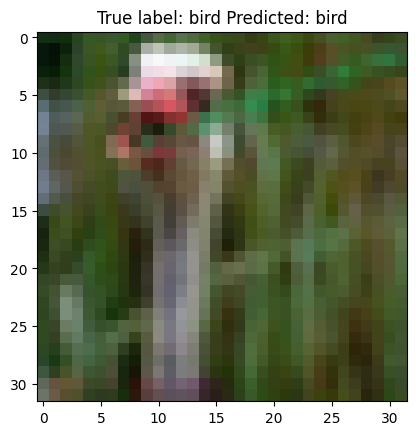

In [15]:
# show classified samples
classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

Text(0.5, 1.0, 'True label: ship Predicted: ship')

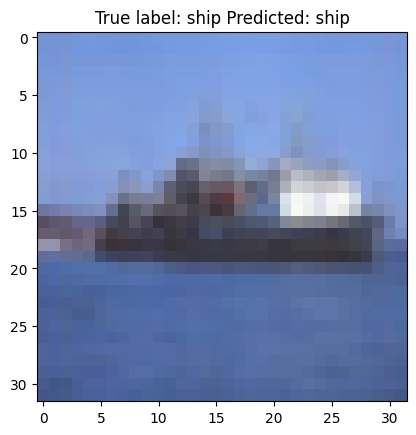

In [16]:
# prediction
predicted_idx = np.where(p_test)[0]
i = np.random.choice(predicted_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))